# Grover's search 

Please refer to: 

* Chapter 16 of Cottrell 

* Chapter 6 of Neilsen and Chaung 

For theory and examples. 

There is alot to cover with theory and things, from a up and coming veteran's perspective I would say PRACTICE PRACTICE, go through the calculations in class on your own and do them from scratch step by step until you can at least kind of get through the reasoning and math. With algorithms like Grover and Shor it can be tricky , so follow the state through the circuit and practice alot!  

I will be covering how to do the search not really the why here since there is alot of machinery here. Mostly the HOW. 

### The how of the Grover 

* Initialize $n$ top qubits in $|0\rangle$ and a bottom qubit in $|1\rangle$. 

* Apply $H^{\otimes n}$ to top qubits and $H$ to bottom qubit.

* Apply the Oracle Black Box. 

* Apply $H^{\otimes n}$ to top qubits.

* Apply Conditional Phase Shift where every computational basis state other than $|0\rangle$ gets a phase of -1 to top qubits. 

* Apply $H^{\otimes n}$ to top qubits and $H$ to bottom qubit.


Lets try it out in Qiskit! 



## Imports 

In [1]:
# Do not forget to Import Qiskit 

from qiskit.visualization import * 
from qiskit import * 

S_simulator=Aer.backends(name='statevector_simulator')[0] 
M_simulator=Aer.backends(name='qasm_simulator')[0] 

# Circuit 

(N=2^n) where n=2 

We will discuss the black box at the end! 

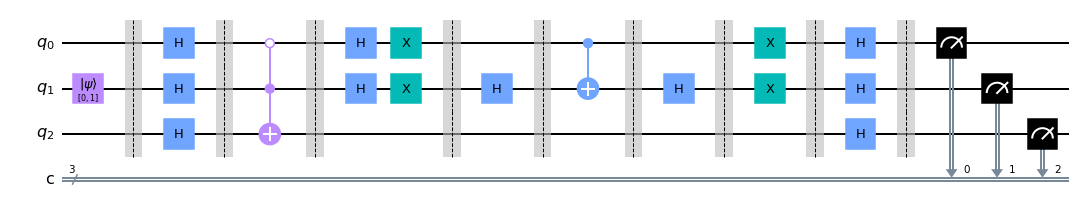

In [2]:
# We will have two top qubits (n=2) and one bottom qubit so our circuit 
# will have 3 qubits in total. 

# Initialize ***

grover = QuantumCircuit(3,3)

# put the last qubit into the |1> state.

one=[0,1]

grover.initialize(one, 1)

#barrier to seperate steps for organization 
grover.barrier()

# Apply H to all the gates *** 
grover.h(0)
grover.h(1)
grover.h(2)

#barrier to seperate steps for organization 
grover.barrier()

#Black box Oracle ***
grover.append(circuit.library.MCXGate(2, ctrl_state='10'), [0,1,2]) 
grover.barrier()

# Phase Shift ***

# Apply H to top qubits
grover.h(0)
grover.h(1) 

# Apply X to top qubits
grover.x(0)
grover.x(1)

#barrier for organization
grover.barrier()


# H on second qubit
grover.h(1)

#barrier for organization
grover.barrier()

# Cnot on first and second qubits
grover.cx(0,1)

# barrier for organization
grover.barrier()

# H on second qubit
grover.h(1)

#barrier
grover.barrier()

# X on first and second qubits
grover.x(0)
grover.x(1)

#barrier
grover.barrier()

# Apply H at the end ***
grover.h(0)
grover.h(1)
grover.h(2)

# barrier
grover.barrier()


# measure all the qubits and put the measurements in their corresponding classical bits 

grover.measure([0,1,2], [0,1,2])

#draw it out 

grover.draw(output='mpl')

# Taking a look at the Oracle or Black box operator

Our Operator changes depending on what we are looking for, in this case we use a multicontrolled controlled X gate, (see Cottrell Chapter 16 exercises #1 for reference) , the MCX (multicontrolled X gate) is a bigger version of CNOT gate used to look for more complicated states as conditions to apply X to the target gate. 

In this case I assumed we wanted to look for the $|01\rangle$ state. 

How we code this out 

```Python
grover.append(circuit.library.MCXGate(2, ctrl_state='10'), [0,1,2])  
```

We Appended the MCX to out circuit which we pulled from the Qiskit circuit library. 
It takes the inputs of the target qubit and the control state (ctrl_state). The append function takes two inputs , the gate we are appending and where we are appending it to, so we use a list of all our qubits , the first, second and third qubits respectively, hence the [0,1,2]. 

Here we see the target qubit is 2, this here means our third or last qubit, remember Python counts starting at 0. 

We also see the ctrl_state='10' , Qiskit uses a reverse encoding, that means the last qubit is written first, so if we wanted to use $|01\rangle$ as the control state then we would use ctrl_state='10' as the input for out MCX gate. 

the ctrl_state='01' input would correspond to looking for the  $|10\rangle$ state.

Playing with the input you can create different oracles in this case there are $ N = 2^n = 4$ possible oracles we can discuss since there are only 4 possible states to look for here.  